## Reexploring the butenedial_ammonia_droplets.csv dataset with new functions to see experimental landscape

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *
from src.d00_utils.processing_utils import perform_bootstrap

In [8]:
compounds, water = load_compounds()
experiments = load_experiments()
constants = load_constants()
paths = load_paths()

In [5]:
from src.d00_utils.data_utils import import_ms_data
from src.d01_data.process_ms_data import *

In [66]:
df = import_ms_data(file_name=paths['raw_data'])
df.nh3_bubbler.unique()

array([   nan, 1.5   , 0.    , 0.0029])

In [61]:
df[~df.nh3_bubbler.isna()].nh3_bubbler

78     1.5000
79     1.5000
80     1.5000
81     0.0000
82     0.0000
83     0.0000
84     0.0000
85     0.0000
86     0.0000
87     0.0000
88     0.0000
89     0.0000
90     0.0000
91     0.0000
92     0.0029
93     0.0029
94     0.0029
95     0.0029
96     0.0029
97     0.0000
98     0.0029
99     0.0029
100    0.0000
Name: nh3_bubbler, dtype: float64

looks like there were three experiments done with ammonia bubbler

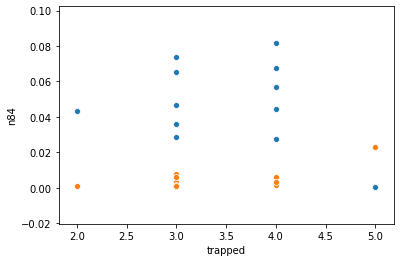

In [62]:
sns.scatterplot(df[df.nh3_bubbler==0.].trapped, df[df.nh3_bubbler==0.].n85)
sns.scatterplot(df[df.nh3_bubbler==0.].trapped, df[df.nh3_bubbler==0.].n84)

it feels like i'm missing data in this dataset? LATER: noticed that some of the "bd-as-droplets" fields were blank during this section. maybe an older version is used and now these guys can't be updated in the spreadhseet. will need to look at the creation of the output code and fill in blanks as necessary.

# Plots of droplet vs. vial tests that were done and data filter/cleaning applications

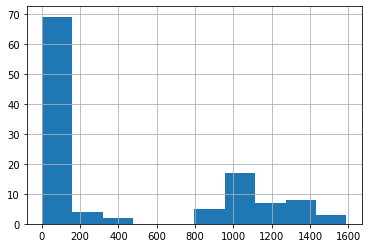

In [67]:
df.vial.hist()

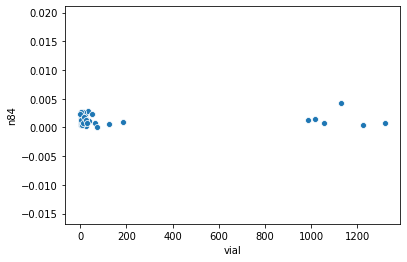

In [77]:
sns.scatterplot(df[df.nh3_vial.notna()].vial, df[df.nh3_vial.notna()].n84)

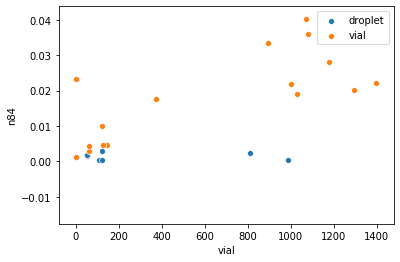

In [87]:
as_vial_query = "comptype=='bd07hg20as03' and trapped<10 and p283>30000"
df_as_vial = df.query(as_vial_query)

as_drop_query = "comptype=='bd07hg20as03' and vial<10"
df_as_drop = df.query(as_drop_query)

sns.scatterplot("trapped","n84",data=df_as_drop,label='droplet')
sns.scatterplot("vial","n84",data=df_as_vial,label='vial')

In [91]:
df_as_vial[df_as_vial.vial < 50]

,date,file,chrom,dc_trap,mfc,src1,src2,signal,vialstart,trapstart,...,p84_j,p85_j,p283_j,n84_j,n84,n85_j,n85,bad_data,nh3_vial,naoh_vial
25,180815,3,2.50,670.0,315.0,close,close,1,NaN,NaN,...,NaN,1616.0,43816.7,NaN,0.001183,0.036881,0.036631,NaN,NaN,NaN
78,181015,2,0.39,601.0,260.0,NaN,NaN,1,10/15/2018 14:59,10/15/2018 15:09,...,NaN,246.6,106182.4,NaN,NaN,0.002322,0.002106,NaN,NaN,NaN
100,181016,1,0.40,590.0,270.0,NaN,NaN,1,10/16/2018 8:59,10/16/2018 9:02,...,NaN,NaN,NaN,NaN,0.023230,NaN,0.000407,NaN,NaN,NaN


In [97]:
subset = ['bd_dry', 'bd_wet']
experiments_subset = dict((k, experiments[k]) for k in subset)
experiments_subset

{'bd_dry': {'composition': {'Butenedial': 0.075, 'PEG-6': 0.2},
  'solution_name': 'bd10hg20_008',
  'idx_range': [63, 500],
  'bad_idx': [113],
  'trap_time': [2, 50],
  'other_query': 'rh<20',
  'y_col': 'mz85/mz283',
  'p283_cutoff': 1000,
  'columns_to_keep': ['trapped', 'comp', 'experiment', 'mz85/mz283'],
  'number_of_steps': 3000.0,
  'r_init': [1.14e-05, 1.44e-05],
  'T': [298.6, 301.6],
  'RH': [0.0, 0.05],
  'x_water': [0.0, 0.05],
  'value_idx': 0,
  'norm_idx': 1,
  'cal_data_time': 5,
  'label': 'BD (dry)'},
 'bd_wet': {'composition': {'Butenedial': 0.075, 'PEG-6': 0.2},
  'solution_name': 'bd10hg20_002',
  'idx_range': [16, 500],
  'bad_idx': None,
  'trap_time': [2, 300],
  'other_query': '(rh>50 or trapped<5)',
  'y_col': 'mz85/mz283',
  'p283_cutoff': 1000,
  'columns_to_keep': ['trapped', 'comp', 'experiment', 'mz85/mz283'],
  'number_of_steps': 3000.0,
  'r_init': [1.14e-05, 1.44e-05],
  'T': [298.6, 301.6],
  'RH': [0.7, 0.8],
  'x_water': [0.77, 0.82],
  'value_idx